In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-data/MSFT.csv


In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')


In [20]:
df=pd.read_csv("/kaggle/input/microsoft-stock-data/MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [21]:
df.shape

(9083, 7)

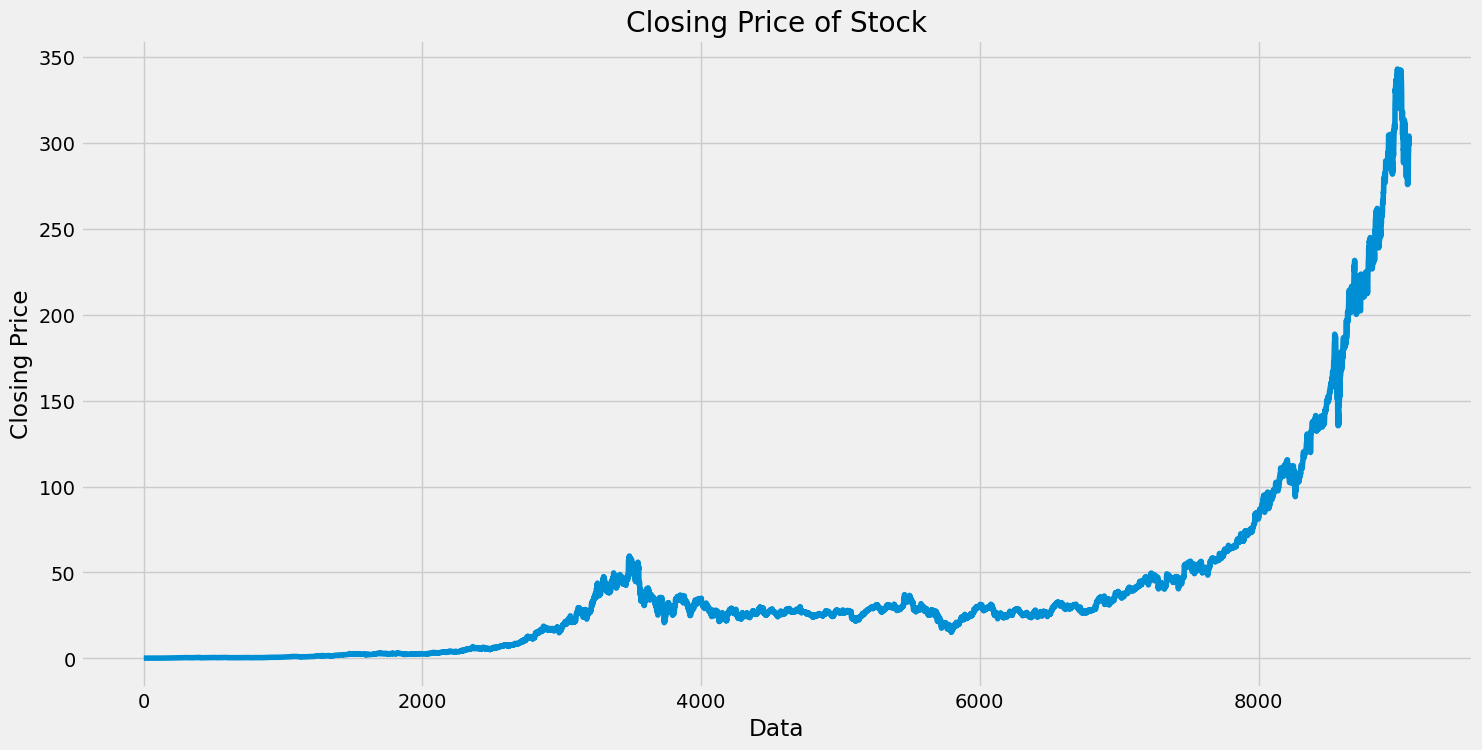

In [22]:
plt.figure(figsize=(16, 8))
plt.title('Closing Price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show()



In [23]:
DATA=df.filter(['Close'])

DATASET=DATA.values 

Training_Dataset_Len=math.ceil(len(DATASET)*0.8)
print(Training_Dataset_Len)

7267


In [24]:
Scaler=StandardScaler()
Scaled_DATA=Scaler.fit_transform(DATASET)

                   
    


In [25]:
TRAIN_DATA=Scaled_DATA[0:Training_Dataset_Len, :]
X_Train=[]
Y_Train=[]
Window_Size=60
for i in range(Window_Size, len(TRAIN_DATA)) :
    X_Train.append(TRAIN_DATA[i-Window_Size:i, :])
    Y_Train.append(TRAIN_DATA[i])
    

In [26]:
X_Train=np.array(X_Train)
Y_Train=np.array(Y_Train)

print(X_Train)

[[[-0.69063008]
  [-0.69057193]
  [-0.69054284]
  ...
  [-0.6902957 ]
  [-0.69026663]
  [-0.69026663]]

 [[-0.69057193]
  [-0.69054284]
  [-0.69058647]
  ...
  [-0.69026663]
  [-0.69026663]
  [-0.69035386]]

 [[-0.69054284]
  [-0.69058647]
  [-0.69061554]
  ...
  [-0.69026663]
  [-0.69035386]
  [-0.69035386]]

 ...

 [[ 0.09117827]
  [ 0.07560331]
  [ 0.04512332]
  ...
  [ 0.09519763]
  [ 0.08565171]
  [ 0.09084331]]

 [[ 0.07560331]
  [ 0.04512332]
  [ 0.03875942]
  ...
  [ 0.08565171]
  [ 0.09084331]
  [ 0.08364206]]

 [[ 0.04512332]
  [ 0.03875942]
  [ 0.04009916]
  ...
  [ 0.09084331]
  [ 0.08364206]
  [ 0.07225393]]]


In [27]:
X_Train.shape
X_Train.reshape(X_Train.shape[0], X_Train.shape[1], 1)


array([[[-0.69063008],
        [-0.69057193],
        [-0.69054284],
        ...,
        [-0.6902957 ],
        [-0.69026663],
        [-0.69026663]],

       [[-0.69057193],
        [-0.69054284],
        [-0.69058647],
        ...,
        [-0.69026663],
        [-0.69026663],
        [-0.69035386]],

       [[-0.69054284],
        [-0.69058647],
        [-0.69061554],
        ...,
        [-0.69026663],
        [-0.69035386],
        [-0.69035386]],

       ...,

       [[ 0.09117827],
        [ 0.07560331],
        [ 0.04512332],
        ...,
        [ 0.09519763],
        [ 0.08565171],
        [ 0.09084331]],

       [[ 0.07560331],
        [ 0.04512332],
        [ 0.03875942],
        ...,
        [ 0.08565171],
        [ 0.09084331],
        [ 0.08364206]],

       [[ 0.04512332],
        [ 0.03875942],
        [ 0.04009916],
        ...,
        [ 0.09084331],
        [ 0.08364206],
        [ 0.07225393]]])

In [28]:
model=Sequential()
model.add(LSTM(200, return_sequences=True,input_shape=(X_Train.shape[1],1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(X_Train, Y_Train, epochs=20)

Epoch 1/20
226/226 [==============================] - 6s 10ms/step - loss: 0.0022
Epoch 2/20
226/226 [==============================] - 2s 10ms/step - loss: 2.3930e-04
Epoch 3/20
226/226 [==============================] - 2s 10ms/step - loss: 2.0635e-04
Epoch 4/20
226/226 [==============================] - 2s 10ms/step - loss: 1.9969e-04
Epoch 5/20
226/226 [==============================] - 3s 12ms/step - loss: 1.8971e-04
Epoch 6/20
226/226 [==============================] - 2s 10ms/step - loss: 1.5949e-04
Epoch 7/20
226/226 [==============================] - 2s 10ms/step - loss: 1.4761e-04
Epoch 8/20
226/226 [==============================] - 2s 10ms/step - loss: 1.4803e-04
Epoch 9/20
226/226 [==============================] - 2s 10ms/step - loss: 1.3552e-04
Epoch 10/20
226/226 [==============================] - 2s 10ms/step - loss: 1.1642e-04
Epoch 11/20
226/226 [==============================] - 2s 10ms/step - loss: 1.0559e-04
Epoch 12/20
226/226 [==============================] - 2

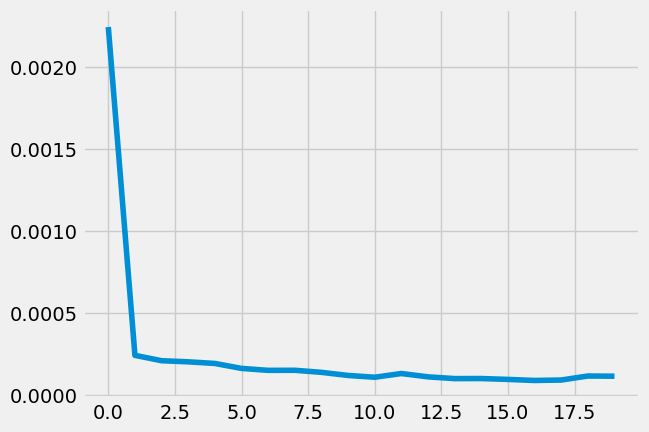

In [31]:
plt.plot(history.history['loss'])

In [32]:
Test_Data=Scaled_DATA[Training_Dataset_Len-60:]
X_Test=[]
Y_Test=DATASET[Training_Dataset_Len :, :]
for i in range(60, len(Test_Data)):
    X_Test.append(Test_Data[i-60:i, 0])
    

In [33]:
X_Test=np.array(X_Test)
X_Test=np.reshape(X_Test, (X_Test.shape[0], X_Test.shape[1], 1))

In [34]:
predictions=model.predict(X_Test)
predictions=Scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 1s 4ms/step
[[ 46.60338 ]
 [ 47.974724]
 [ 47.61668 ]
 ...
 [289.2866  ]
 [291.7803  ]
 [290.0986  ]]
